In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [56]:
data = pd.read_csv("C:/Users/melko/Desktop/ММО/pokedex_(Update_04.21).csv")

In [57]:
data.head()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [58]:
data = data.drop('type_number', 1)
data.head()

C:\Users\melko\AppData\Local\Temp\ipykernel_13572\2858338927.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('type_number', 1)


,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_1,type_2,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,Fire,NaN,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [59]:
# Удаление колонок с высоким процентом пропусков (более 25%)
data.dropna(axis=1, thresh=1044)

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_1,height_m,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,Grass,0.7,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,Grass,1.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,Grass,2.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,Grass,2.4,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,Fire,0.6,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1040,896,Glastrier,Polaross,ブリザポス (Burizaposu),8,Sub Legendary,Wild Horse Pokémon,Ice,2.2,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1041,1041,897,Spectrier,Phantoross,レイスポス (Reisuposu),8,Sub Legendary,Swift Horse Pokémon,Ghost,2.0,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1042,1042,898,Calyrex,Coronospa,バドレックス (Budrex),8,Legendary,King Pokémon,Psychic,1.1,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1043,1043,898,Calyrex Ice Rider,Coronospa,バドレックス (Budrex),8,Legendary,High King Pokémon,Psychic,2.4,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [62]:
# Заполним пропуски средними значениями
def impute_na(df, variable, value):
    df[variable].fillna(value, inplace=True)
impute_na(data, 'percentage_male', data['percentage_male'].mean())

In [63]:
data.describe()

,Unnamed: 0,pokedex_number,generation,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,1045.000000,1045.000000,1045.000000,1045.000000,1044.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,...,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,522.000000,440.769378,4.098565,1.374067,71.216571,2.268900,439.353110,70.067943,80.476555,74.670813,...,1.082297,1.168900,0.977273,0.998086,1.238278,1.018660,0.977033,1.071053,0.981579,1.091148
std,301.809819,262.517231,2.272788,3.353349,132.259911,0.803154,121.992897,26.671411,32.432728,31.259462,...,0.782683,0.592145,0.501934,0.610411,0.696560,0.568056,0.375812,0.465178,0.501753,0.536285
min,0.000000,1.000000,1.000000,0.100000,0.100000,0.000000,175.000000,1.000000,5.000000,5.000000,...,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000
25%,261.000000,212.000000,2.000000,0.600000,9.000000,2.000000,330.000000,50.000000,55.000000,50.000000,...,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,522.000000,436.000000,4.000000,1.000000,29.500000,2.000000,458.000000,68.000000,77.000000,70.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,783.000000,670.000000,6.000000,1.600000,70.500000,3.000000,515.000000,82.000000,100.000000,90.000000,...,1.500000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1044.000000,898.000000,8.000000,100.000000,999.900000,3.000000,1125.000000,255.000000,190.000000,250.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000


In [69]:
def obj_col(column): 
    return column[1] == 'object'

col_names = []
for col in list(filter(obj_col, list(zip(list(data.columns), list(data.dtypes))))):
  col_names.append(col[0])
col_names.append('name')

In [70]:
X_ALL = data.drop(col_names, axis=1)

In [71]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [73]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['name'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((836, 37), (209, 37))

StandardScaler

In [74]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,Unnamed: 0,pokedex_number,generation,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,-1.730394,-1.676004,-1.363985,-0.201109,-0.486522,-0.334965,-0.995232,-0.940331,-0.970983,-0.821611,...,-0.105197,1.404213,2.038550,0.003137,-0.342241,-0.032865,0.061141,-0.152816,0.036731,-1.102831
1,-1.727079,-1.672193,-1.363985,-0.111604,-0.440379,-0.334965,-0.281734,-0.377661,-0.569961,-0.373532,...,-0.105197,1.404213,2.038550,0.003137,-0.342241,-0.032865,0.061141,-0.152816,0.036731,-1.102831
2,-1.723764,-1.668382,-1.363985,0.186748,0.217732,-0.334965,0.702401,0.372564,0.046995,0.266581,...,-0.105197,1.404213,2.038550,0.003137,-0.342241,-0.032865,0.061141,-0.152816,0.036731,-1.102831
3,-1.720449,-1.668382,-1.363985,0.306089,0.637561,-1.580652,1.522513,0.372564,0.602256,1.546806,...,-0.105197,1.404213,2.038550,0.003137,-0.342241,-0.032865,0.061141,-0.152816,0.036731,-1.102831
4,-1.717134,-1.664571,-1.363985,-0.230945,-0.474419,-0.334965,-1.069042,-1.165398,-0.878440,-1.013644,...,1.173070,-0.285370,0.045301,-0.816375,1.094073,-0.032865,0.061141,-0.152816,-0.960253,-1.102831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1.717134,1.734928,1.717408,0.246419,5.512878,-1.580652,1.153463,1.122790,1.990407,1.770846,...,-0.105197,-0.285370,0.045301,0.003137,1.094073,-0.032865,0.061141,-0.152816,2.030699,-0.170044
1041,1.720449,1.738739,1.717408,0.186748,-0.202097,-1.580652,1.153463,1.122790,-0.477418,-0.469549,...,-0.105197,-0.285370,0.045301,-0.816375,-0.342241,1.728367,0.061141,1.997928,0.036731,-0.170044
1042,1.723764,1.742551,1.717408,-0.081768,-0.480471,-1.580652,0.497373,1.122790,-0.014701,0.170564,...,-0.744331,1.404213,-0.951323,4.920211,-0.342241,1.728367,0.061141,1.997928,0.036731,-0.170044
1043,1.727079,1.742551,1.717408,0.306089,5.581715,-1.580652,1.973575,1.122790,2.607364,2.410958,...,-0.105197,-0.285370,-0.951323,1.642162,1.094073,1.728367,0.061141,1.997928,2.030699,-0.170044


In [75]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

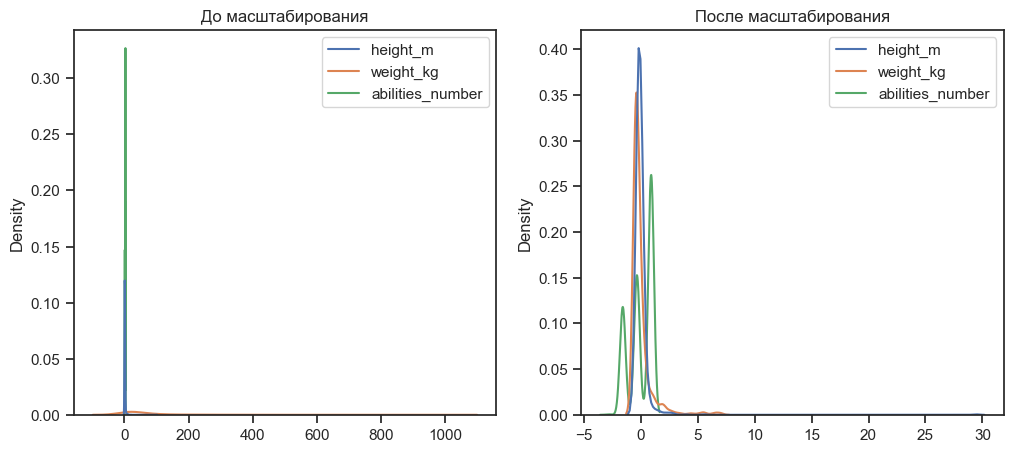

In [77]:
draw_kde(['height_m', 'weight_kg', 'abilities_number'], data, data_cs11_scaled, 'До масштабирования', 'После масштабирования')

Масштабирование "Mean Normalisation"

In [79]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['name'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((836, 37), (209, 37))

In [80]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [81]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,Unnamed: 0,pokedex_number,generation,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,1045.000000,1045.000000,1045.000000,1045.000000,1044.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,...,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,-0.001798,-0.001655,-0.000444,-0.000013,-0.000486,-0.002073,0.002083,-0.000227,0.001744,0.001376,...,-0.000957,0.000941,-0.001794,0.002362,-0.000813,0.001675,0.000778,0.000367,0.000628,0.000583
std,0.289090,0.292661,0.324684,0.033567,0.132286,0.267718,0.128414,0.105006,0.180182,0.127590,...,0.195671,0.157905,0.125483,0.152603,0.185749,0.142014,0.187906,0.124047,0.125438,0.134071
min,-0.501798,-0.491922,-0.443096,-0.012766,-0.071616,-0.758373,-0.276184,-0.272148,-0.417570,-0.282995,...,-0.271531,-0.244099,-0.246112,-0.247159,-0.264354,-0.252990,-0.487739,-0.218581,-0.244767,-0.272204
25%,-0.251798,-0.256693,-0.300239,-0.007761,-0.062715,-0.091707,-0.113026,-0.079235,-0.139793,-0.099321,...,-0.146531,-0.044099,0.003888,-0.122159,-0.064354,-0.002990,0.012261,-0.018581,-0.119767,-0.022204
50%,-0.001798,-0.006972,-0.014525,-0.003757,-0.042210,-0.091707,0.021711,-0.008368,-0.017570,-0.017689,...,-0.021531,-0.044099,0.003888,0.002841,-0.064354,-0.002990,0.012261,-0.018581,0.005233,-0.022204
75%,0.248202,0.253898,0.271189,0.002249,-0.001202,0.241627,0.081711,0.046750,0.110207,0.063944,...,0.103469,-0.044099,0.003888,0.002841,0.202313,-0.002990,0.012261,-0.018581,0.005233,-0.022204
max,0.498202,0.508078,0.556904,0.987234,0.928384,0.241627,0.723816,0.727852,0.610207,0.717005,...,0.728469,0.755901,0.753888,0.752841,0.735646,0.747010,0.512261,0.781419,0.755233,0.727796


In [82]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [83]:
data_cs22_scaled_train.describe()

,Unnamed: 0,pokedex_number,generation,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,8.360000e+02,8.360000e+02,8.360000e+02,8.360000e+02,8.350000e+02,8.360000e+02,8.360000e+02,8.360000e+02,8.360000e+02,8.360000e+02,...,8.360000e+02,8.360000e+02,8.360000e+02,8.360000e+02,8.360000e+02,8.360000e+02,8.360000e+02,8.360000e+02,8.360000e+02,8.360000e+02
mean,-5.099589e-17,2.416993e-17,-2.290831e-17,5.877517e-18,-5.547791e-17,7.828666e-17,-3.971604e-18,1.422224e-17,-2.111549e-17,-1.031704e-17,...,-3.240364e-17,-1.769584e-17,3.638769e-17,6.972094e-18,2.333992e-17,-9.296126e-18,-1.420979e-17,3.671970e-17,5.411673e-18,-7.861866e-17
std,2.847854e-01,2.883602e-01,3.205594e-01,3.683177e-02,1.348708e-01,2.682395e-01,1.281068e-01,1.089239e-01,1.806576e-01,1.270387e-01,...,1.955816e-01,1.549915e-01,1.260578e-01,1.526382e-01,1.872303e-01,1.405401e-01,1.873606e-01,1.225165e-01,1.245902e-01,1.371608e-01
min,-5.017977e-01,-4.919215e-01,-4.430964e-01,-1.276635e-02,-7.161636e-02,-7.583732e-01,-2.761836e-01,-2.721480e-01,-4.175704e-01,-2.829948e-01,...,-2.715311e-01,-2.440989e-01,-2.461124e-01,-2.471591e-01,-2.643541e-01,-2.529904e-01,-4.877392e-01,-2.185805e-01,-2.447667e-01,-2.722039e-01
25%,-2.424586e-01,-2.469382e-01,-3.002392e-01,-8.762351e-03,-6.321468e-02,-9.170654e-02,-1.130257e-01,-7.923464e-02,-1.397927e-01,-9.932136e-02,...,-1.465311e-01,-4.409888e-02,3.887560e-03,-1.221591e-01,-6.435407e-02,-2.990431e-03,1.226077e-02,-1.858054e-02,-1.197667e-01,-2.220395e-02
50%,-2.755550e-03,-8.086498e-03,-1.452495e-02,-3.757346e-03,-4.271058e-02,-9.170654e-02,1.855326e-02,-2.017952e-02,-2.868155e-02,-1.768870e-02,...,-2.153110e-02,-4.409888e-02,3.887560e-03,2.840909e-03,-6.435407e-02,-2.990431e-03,1.226077e-02,-1.858054e-02,5.233254e-03,-2.220395e-02
75%,2.426946e-01,2.474876e-01,2.711893e-01,2.248660e-03,-2.702576e-03,2.416268e-01,8.171116e-02,5.068662e-02,1.102073e-01,6.394395e-02,...,1.034689e-01,-4.409888e-02,3.887560e-03,2.840909e-03,2.023126e-01,-2.990431e-03,1.226077e-02,-1.858054e-02,5.233254e-03,-2.220395e-02
max,4.982023e-01,5.080785e-01,5.569036e-01,9.872336e-01,9.283836e-01,2.416268e-01,7.238164e-01,7.278520e-01,5.824296e-01,7.170052e-01,...,7.284689e-01,7.559011e-01,7.538876e-01,7.528409e-01,7.356459e-01,7.470096e-01,5.122608e-01,7.814195e-01,7.552333e-01,7.277961e-01


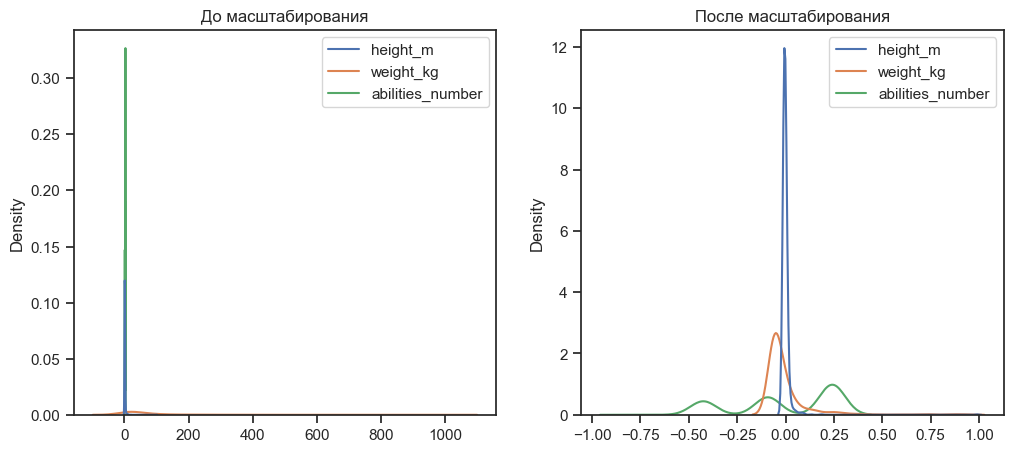

In [84]:
draw_kde(['height_m', 'weight_kg', 'abilities_number'], data, data_cs21_scaled, 'До масштабирования', 'После масштабирования')


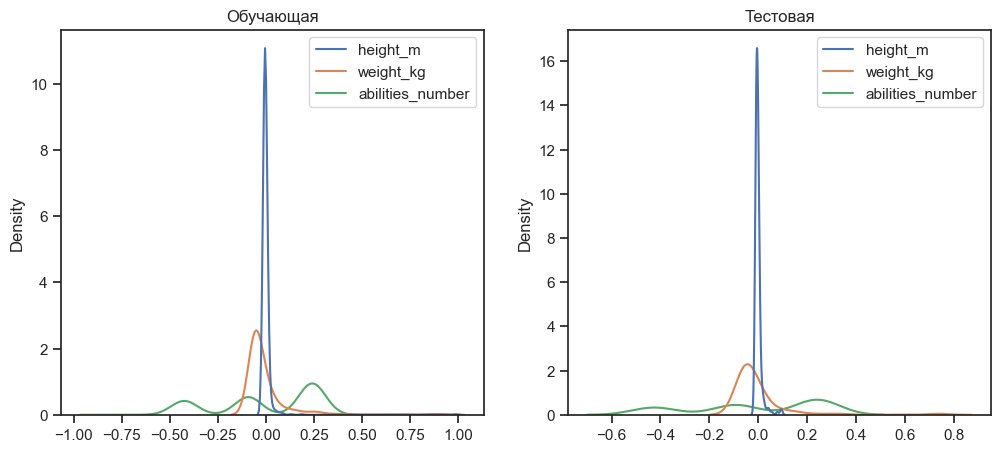

In [85]:
draw_kde(['height_m', 'weight_kg', 'abilities_number'], data_cs22_scaled_train, data_cs22_scaled_test, 'Обучающая', 'Тестовая')

MinMax-масштабирование

In [86]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,Unnamed: 0,pokedex_number,generation,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,1045.00000,1045.000000,1045.000000,1045.000000,1044.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,...,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,0.50000,0.490267,0.442652,0.012753,0.071131,0.756300,0.278266,0.271921,0.407981,0.284371,...,0.270574,0.245040,0.244318,0.249522,0.263541,0.254665,0.488517,0.218947,0.245395,0.272787
std,0.28909,0.292661,0.324684,0.033567,0.132286,0.267718,0.128414,0.105006,0.175312,0.127590,...,0.195671,0.157905,0.125483,0.152603,0.185749,0.142014,0.187906,0.124047,0.125438,0.134071
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.25000,0.235229,0.142857,0.005005,0.008902,0.666667,0.163158,0.192913,0.270270,0.183673,...,0.125000,0.200000,0.250000,0.125000,0.200000,0.250000,0.500000,0.200000,0.125000,0.250000
50%,0.50000,0.484950,0.428571,0.009009,0.029406,0.666667,0.297895,0.263780,0.389189,0.265306,...,0.250000,0.200000,0.250000,0.250000,0.200000,0.250000,0.500000,0.200000,0.250000,0.250000
75%,0.75000,0.745819,0.714286,0.015015,0.070414,1.000000,0.357895,0.318898,0.513514,0.346939,...,0.375000,0.200000,0.250000,0.250000,0.466667,0.250000,0.500000,0.200000,0.250000,0.250000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

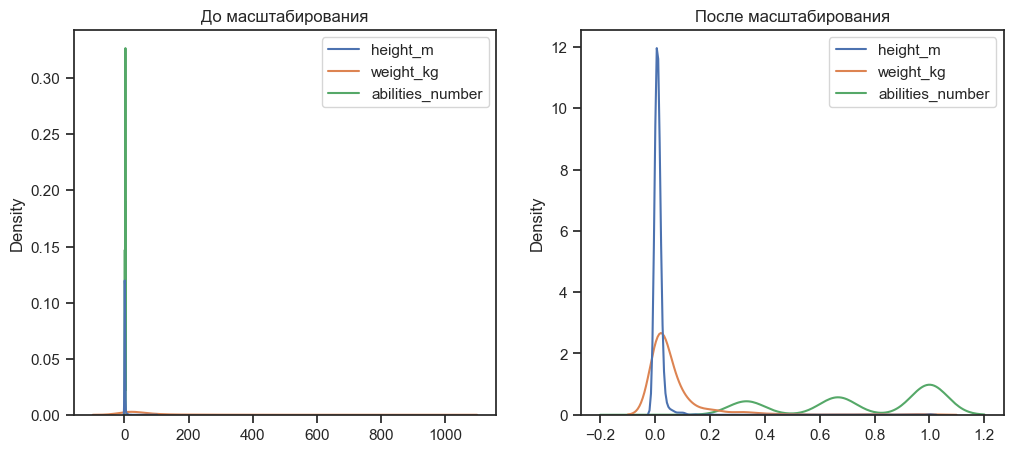

In [88]:
draw_kde(['height_m', 'weight_kg', 'abilities_number'], data, data_cs31_scaled, 'До масштабирования', 'После масштабирования')

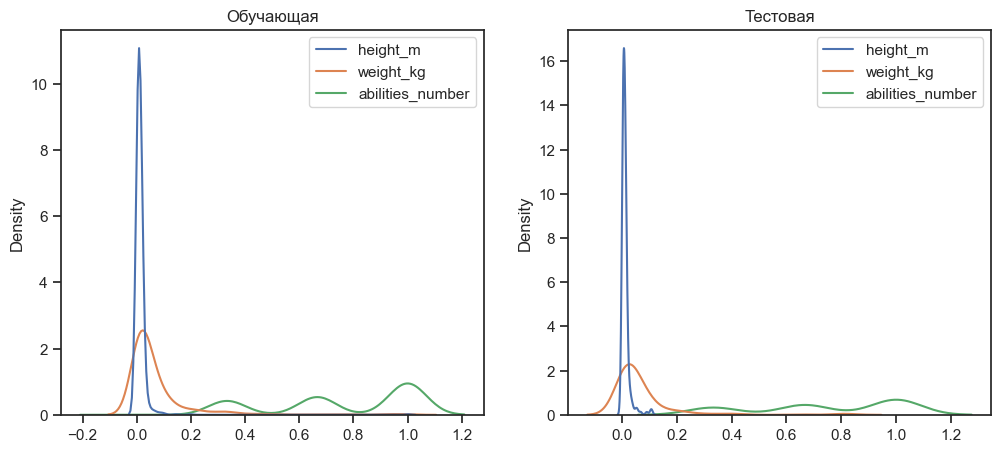

In [89]:
draw_kde(['height_m', 'weight_kg', 'abilities_number'], data_cs32_scaled_train, data_cs32_scaled_test, 'Обучающая', 'Тестовая')

Обработка выбросов для числовых признаков

In [90]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # violinplot
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # boxplot
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

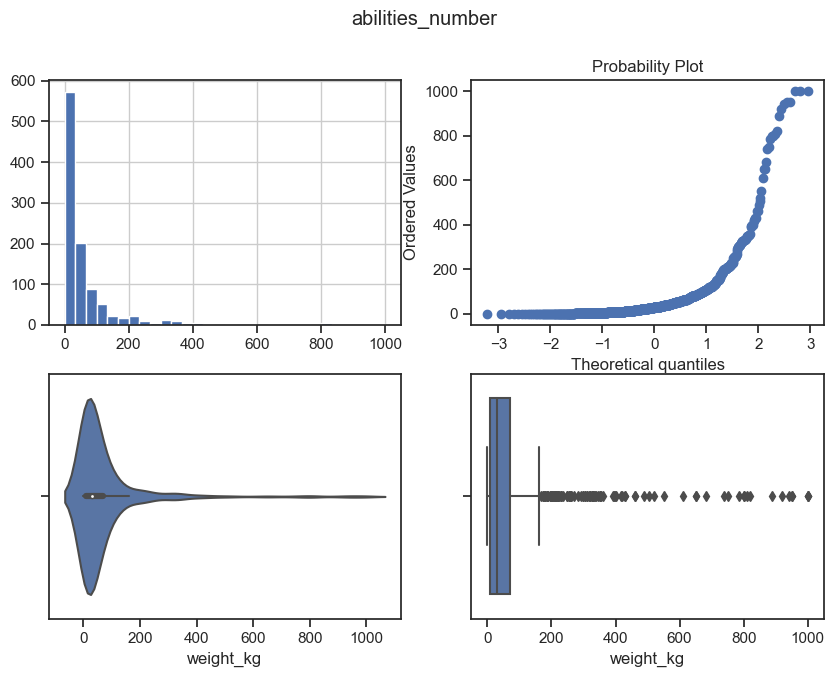

In [92]:
diagnostic_plots(data, 'weight_kg', 'abilities_number')

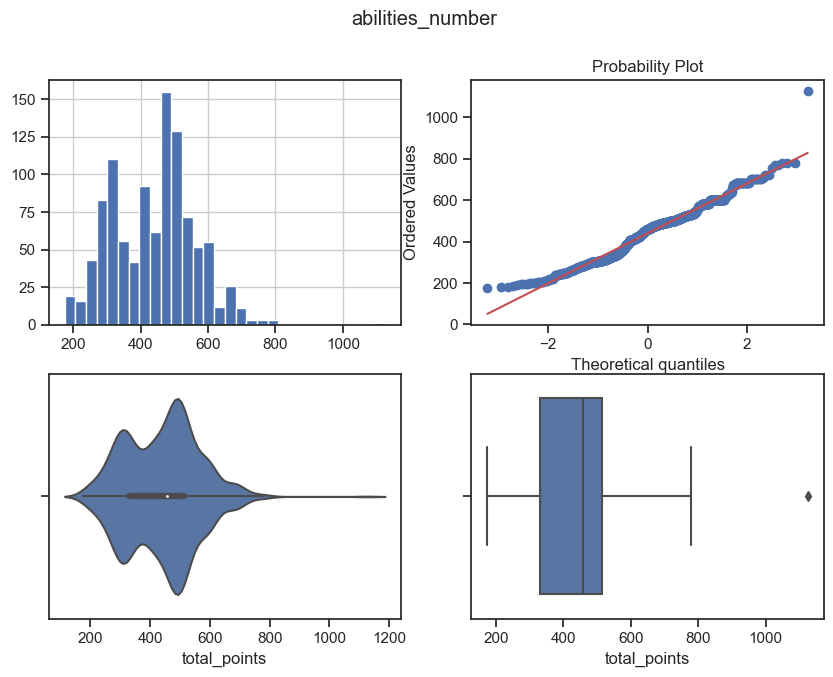

In [95]:
diagnostic_plots(data, 'total_points', 'abilities_number')

In [96]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [97]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col):
    lower_boundary = df[col].quantile(0.05)
    upper_boundary = df[col].quantile(0.95)
    return lower_boundary, upper_boundary

Удаление выбросов (number_of_reviews)

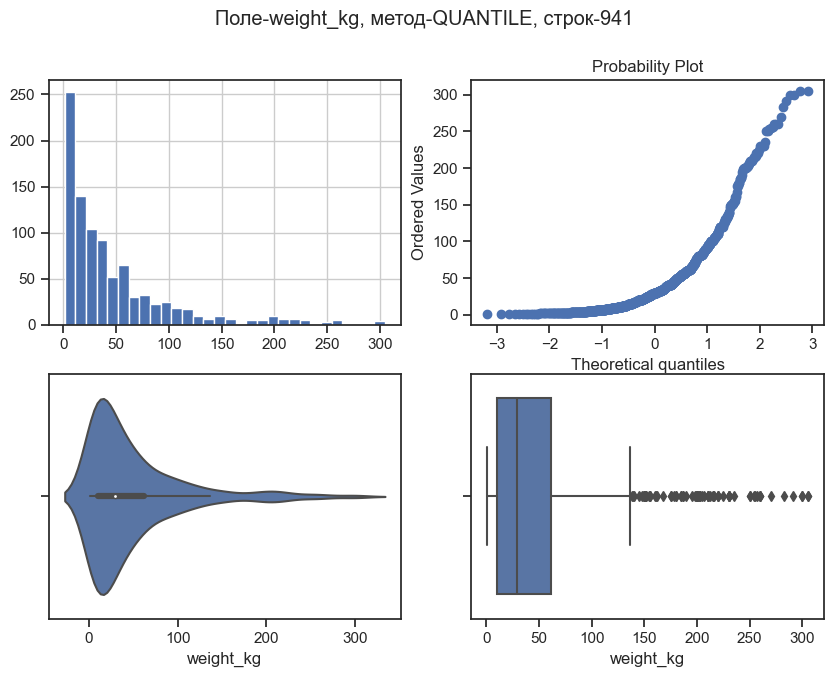

In [103]:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(data, "weight_kg")
# Флаги для удаления выбросов
outliers_temp = np.where(data["weight_kg"] > upper_boundary, True, 
                         np.where(data["weight_kg"] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = data.loc[~(outliers_temp), ]  
title = 'Поле-{}, метод-{}, строк-{}'.format("weight_kg", "QUANTILE", data_trimmed.shape[0])
diagnostic_plots(data_trimmed, "weight_kg", title)

Замена выбросов

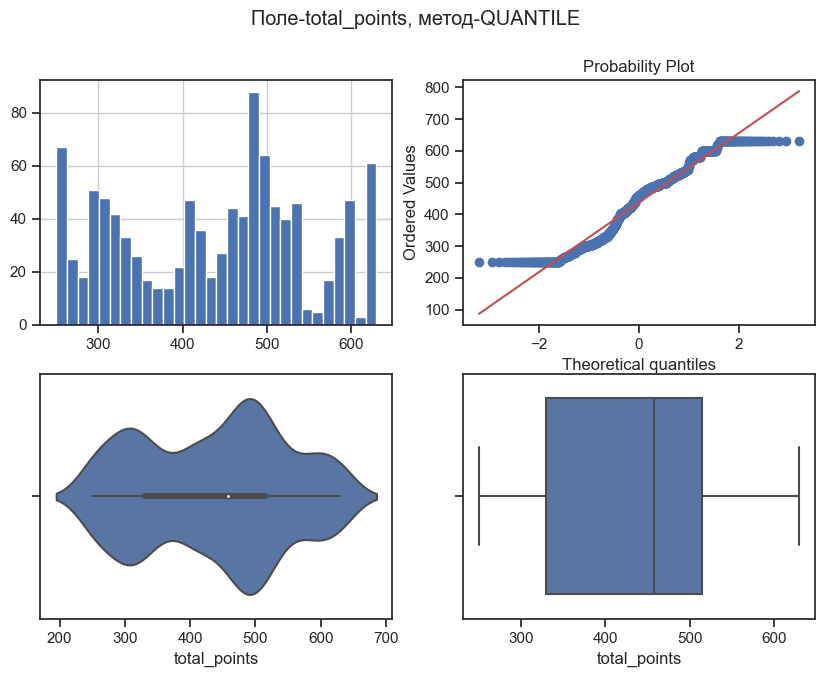

In [104]:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(data, "total_points")
# Изменение данных
data["total_points"] = np.where(data["total_points"] > upper_boundary, upper_boundary,
                     np.where(data["total_points"] < lower_boundary, lower_boundary, data["total_points"]))
title = 'Поле-{}, метод-{}'.format("total_points", "QUANTILE")
diagnostic_plots(data, "total_points", title)

Обработка нестандартного признака

In [106]:
data.dtypes

Unnamed: 0            int64
pokedex_number        int64
name                 object
german_name          object
japanese_name        object
generation            int64
status               object
species              object
type_1               object
type_2               object
height_m            float64
weight_kg           float64
abilities_number      int64
ability_1            object
ability_2            object
ability_hidden       object
total_points        float64
hp                    int64
attack                int64
defense               int64
sp_attack             int64
sp_defense            int64
speed                 int64
catch_rate          float64
base_friendship     float64
base_experience     float64
growth_rate          object
egg_type_number       int64
egg_type_1           object
egg_type_2           object
percentage_male     float64
egg_cycles          float64
against_normal      float64
against_fire        float64
against_water       float64
against_electric    

Метод фильтрации (Корреляция признаков)

<AxesSubplot:>

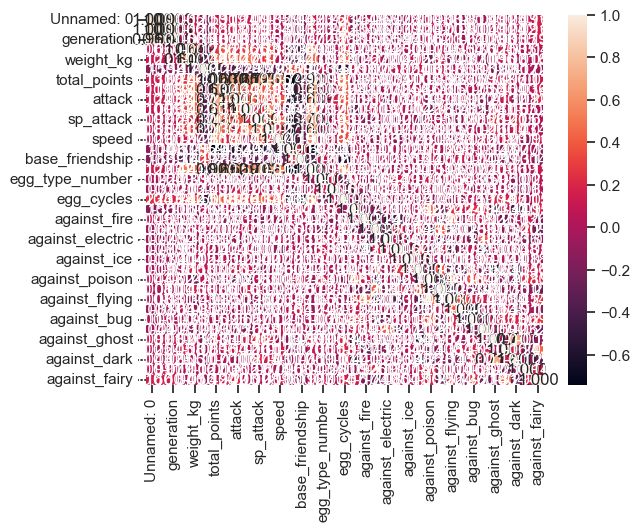

In [115]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

In [116]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.3]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [117]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [118]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['Unnamed: 0', 'generation', 'pokedex_number'],
 ['base_experience',
  'catch_rate',
  'sp_attack',
  'attack',
  'sp_defense',
  'hp',
  'defense',
  'speed',
  'egg_cycles',
  'weight_kg',
  'abilities_number',
  'total_points'],
 ['against_dark', 'against_fight', 'against_normal', 'against_ghost'],
 ['weight_kg',
  'base_experience',
  'hp',
  'base_friendship',
  'sp_defense',
  'defense',
  'catch_rate',
  'height_m'],
 ['against_normal',
  'against_flying',
  'against_ground',
  'against_bug',
  'against_water',
  'against_poison'],
 ['against_bug', 'against_flying', 'against_psychic'],
 ['against_flying', 'against_grass', 'against_fire'],
 ['against_dragon', 'against_fairy'],
 ['against_rock', 'against_electric']]

Отбор признаков

In [152]:
data2 = pd.read_csv("C:/Users/melko/Desktop/ММО/DailyDelhiClimateTest.csv", sep=",")

In [153]:
# Сконвертируем дату и время в нужный формат
data2["date_new"] = data2.apply(lambda x: pd.to_datetime(x["date"], format='%Y-%m-%d'), axis=1)

In [154]:
data2.head(5)

,date,meantemp,humidity,wind_speed,meanpressure,date_new
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,2017-01-01
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,2017-01-02
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,2017-01-03
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,2017-01-04
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,2017-01-05


In [155]:
data2.dtypes

date                    object
meantemp               float64
humidity               float64
wind_speed             float64
meanpressure           float64
date_new        datetime64[ns]
dtype: object

In [156]:
# День
data2['date'] = data2['date_new'].dt.day
# Месяц
data2['date'] = data2['date_new'].dt.month
# Год
data2['date'] = data2['date_new'].dt.year

Метод из группы методов вложений

In [139]:
data3 = pd.read_csv("C:/Users/melko/Desktop/ММО/WineQT.csv", sep=",")

In [140]:
X3_ALL = data3.drop(['quality'], axis=1)

In [142]:
# Разделим выборку на обучающую и тестовую
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_ALL, data3['quality'],
                                                    test_size=0.2,
                                                    random_state=1)

In [143]:
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(X3_train, y3_train)
# Коэффициенты регрессии
e_lr1.coef_

array([[ 8.12685010e-01,  1.13666762e+01,  7.82623669e+00,
         2.73003859e-01,  2.20854445e+00, -8.14499398e-02,
        -6.07359291e-02, -9.71364320e+00,  1.05928330e+01,
        -3.02935401e+00, -3.49793957e+00,  4.48070237e-03],
       [-1.70947991e-02,  3.42135554e+00, -1.21007833e-01,
         8.32452278e-02,  3.20689559e+00,  1.03669460e-02,
        -1.25693925e-02, -5.18479271e+00,  2.46658035e+00,
         9.88462824e-01, -2.04766665e-01, -4.73535890e-04],
       [-1.50633685e-01,  1.93721323e+00,  1.12321685e+00,
         1.01141678e-02,  1.55206374e+00, -1.74615115e-02,
         1.48826890e-02,  5.10001726e+00, -2.81228295e-02,
        -2.62509731e+00, -9.26899115e-01,  5.26799951e-05],
       [ 1.90322225e-01, -1.79843954e+00, -2.04300613e+00,
        -4.72955643e-02,  2.58455381e+00,  1.21352411e-02,
        -7.83754176e-03, -2.99949432e+00,  9.79232831e-01,
         8.78802257e-01,  2.38635326e-01,  1.63131072e-04],
       [-2.89452663e-02, -3.07001091e+00,  1.4749051

In [144]:
# Все признаки являются "хорошими"
from sklearn.feature_selection import SelectFromModel
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(X3_train, y3_train)
sel_e_lr1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [145]:
e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=2000, dual=False)
e_lr2.fit(X3_train, y3_train)
# Коэффициенты регрессии
e_lr2.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -4.11591570e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -8.74405187e-02,  2.16194781e-05],
       [-3.25641929e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.53904648e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -5.09593163e-02, -7.57549148e-05],
       [ 5.38390797e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.01429795e-02,
         9.74861232e-03,  0.00000000e+00,  2.69014647e-01,
         0.00000000e+00, -1.39188114e-01,  6.67329635e-05],
       [-3.23204862e-03,  0.00000000e+00,  0.00000000e+00,
        -3.14434362e-03,  0.00000000e+00,  8.03246225e-03,
        -6.31203138e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.50719047e-05],
       [-3.14597058e-03,  0.00000000e+00,  0.0000000

In [146]:
# Признаки с флагом False д.б. исключены
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(X3_train, y3_train)
sel_e_lr2.get_support()

array([ True, False, False,  True, False,  True,  True, False,  True,
       False,  True,  True])